# TASK 2 : To Explore Supervised Machine Learning

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple Linear regression task as it involves just two variables.

## Linear Regression

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is called dependent variable.

## Linear Regression with Python Scikit Learn Library

In the task we will see how the Scikit-Learn Library for machine learning in Python can be used to implement linear regression. We will apply simple linear regression in this task as it involves two variables only.

In [1]:
# Importing required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
print("The modules are imported.")

The modules are imported.


In [2]:
# Importing the dataset

url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
Data = pd.read_csv(url)
print("The dataset is imported successfully")

The dataset is imported successfully


## Exploratory Data Analysis

In [3]:
# Checking the head of the data

Data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


The dataset contains the marks scored by the students based upon the number of hours they study. 

In [4]:
# Checking the column headers of the dataset

Data.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
# Checking the number of rows and columns of the dataset

Data.shape

(25, 2)

There are 25 rows and 2 columns in the dataset.

In [6]:
# Checking the datatypes of each variable in the dataset

Data.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
# checking for missing observations

Data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Here, we can clearly see that there is no missing observation in the dataset and the dataset is quite clean and appropriate for the further analysis.

In [8]:
# Calculating the mean of the dataset

Data["Hours"].mean()

5.012

The average time spend by the students in studies is 5.012 hours. Obviously this value gives us such a vague idea about the average time spent in studying as there are some students who spend quite less time in studying and some who spend more than the average value.

In [9]:
# Calculating the median of the dataset

Data["Hours"].median()

4.8

The median time spend by the students on studying is 4.8 which is less than the mean i.e. 5.012.

In [10]:
# Checking the concise summary of the dataset 

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
# Calculating the descriptive statistics of the dataset

Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


The describe function shows the descriptive statistics of the dataset. The mean marks scored by the student is 51.48. The maximum and minimum scores are 95 and 17 respectively. Here we can clearly see that the mean value of both the variables are greater than the mean, this implies that the distribution is skewed towards the right.

## Boxplot

Text(0.5, 1.0, 'Boxplot of No. of Hours spent by the students studying')

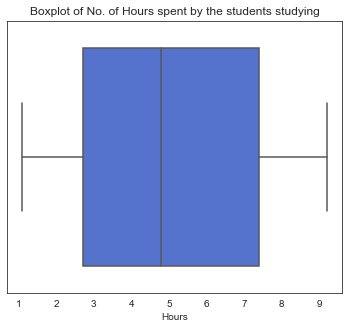

In [12]:
# Checking for outliers
# Boxplot of no. of hours spent by the student studying
sns.set_style('white')
plt.figure(figsize=(6,5))
sns.boxplot(Data["Hours"], color='royalblue')
plt.title("Boxplot of No. of Hours spent by the students studying")

From the boxplot above, we can clearly say that the independent variable (Hours) do not contain any outliers.

Text(0.5, 1.0, 'Boxplot of Scores obtained by the students')

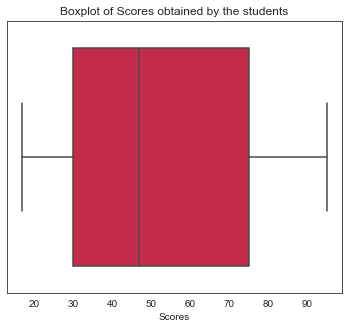

In [13]:
# Boxplot of Scores obtained by the students

plt.figure(figsize=(6,5))
sns.boxplot(Data["Scores"], color='crimson')
plt.title("Boxplot of Scores obtained by the students")

From the boxplot above, we can clearly say that the dependent variable (Scores) do not contain any outliers.

## Scatterplot

Text(0.5, 1.0, 'Scatterplot of Hours v/s Scores')

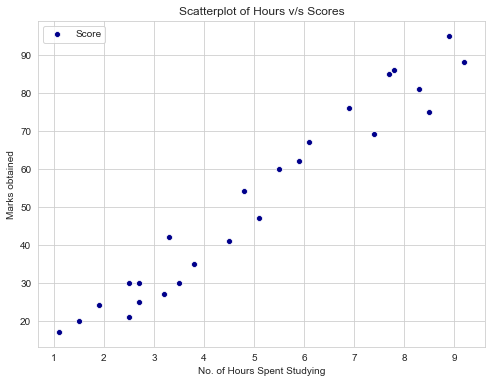

In [14]:
# Plotting the scatter plot so as to figureout the relationship between the 'Hours' and 'Scores'

sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.scatterplot(x="Hours", y="Scores", data=Data, color="DarkBlue", label="Score")
plt.xlabel("No. of Hours Spent Studying")
plt.ylabel("Marks obtained")
plt.title("Scatterplot of Hours v/s Scores")

Clearly, we can see that there is some linear relationship between the 'Hours' and 'Scores'. Apparently, there are no outliers to the data i.e. extreme values. It is quite clear that as the no. of hours spent studying increases the scores obtained by the students increases.

## Correlation

Correlation means association - more precisely it is a statistical measure to evaluate the strength of linear relationship between two quantitative variables. Based on the linear relationship, correlation can be positive, negative and zero. A high correlation indicates string relationship between the two variables while a weak correlation indicates the variables are hardly related. 

<B>Defining Hypothesis</B><br>
<U>Null hypothesis</U> : There is no correlation between 'Hours of study' and 'Scores'.<br>
<U>Alternative hypothesis</U> : There is a correlation between 'Hours of study' and 'Scores'.

In [15]:
# Calculating the correlation between the 'Hours' and 'Scores'

from scipy.stats import pearsonr
corr,p_value = pearsonr(Data["Hours"], Data["Scores"])
print("The correlation between the no. of hours spend studying and scores obtained is ",corr)
print("p-value =",p_value)

The correlation between the no. of hours spend studying and scores obtained is  0.9761906560220884
p-value = 9.132624467460325e-17


Here the correlation value is coming out to be 0.97619 which is fairly high as can be inferred from the fact that more the student spend time in studying, more will be the scores obtained. Also, in support we have our p-value to be less than 0.05, so we may reject the null hypothesis that there is no correlation between the 'Hours of study' and 'Scores'.

We can support the same result using heatmap as well.

## Heatmap

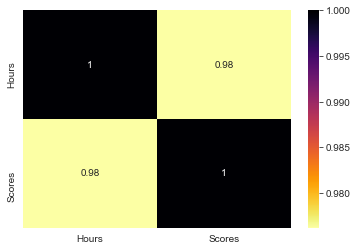

In [16]:
# Heatmap

correlation = Data.corr()
sns.heatmap(correlation, annot=True, cmap='inferno_r')

The heatmap shows that there is very high positive correlation between 'Hours' and 'Scores'.

## Regression Plot

Text(0.5, 1.0, 'Regression line of Hours v/s Scores')

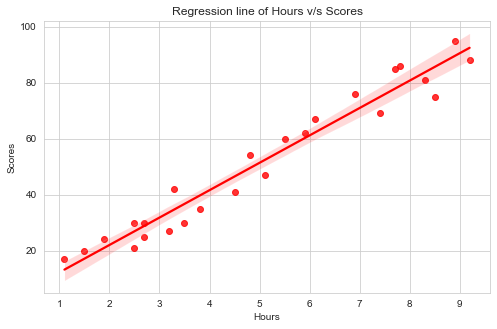

In [17]:
# Fitting of regression line

plt.figure(figsize=(8,5))
sns.regplot(x=Data["Hours"], y=Data["Scores"], color="Red")
plt.title("Regression line of Hours v/s Scores")

As the no. of hours of study goes up, the score obtained by the student goes up, this indicates a positive direct correlation between the two variables. No. of hours seems a pretty good predictor of scores since the regression line is almost a perfect diagonal line.

## Residual Plot

Residuals are the leftover variation in the data after accounting for the model fit:<br>
Data = Fit + Residual<br>
Each observation will have a residual. If an observation is above the regression line, then
its residual, the vertical distance from the observation to the line, is positive. Observations
below the line have negative residuals. One goal in picking the right linear model is for
these residuals to be as small as possible.

Text(0.5, 1.0, 'Residual Plot of Hours v/s Scores')

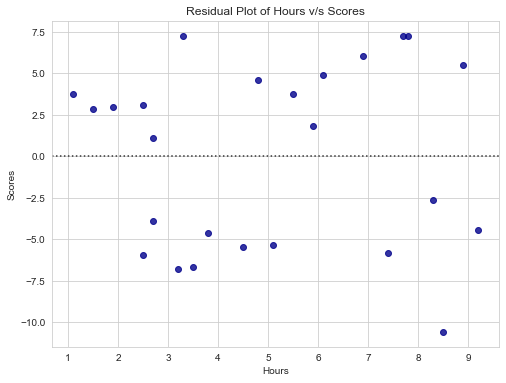

In [18]:
# Residual Plot

plt.figure(figsize=(8,6))
sns.residplot(x="Hours", y="Scores", data=Data, color="DarkBlue")
plt.title("Residual Plot of Hours v/s Scores")

Here we can clearly see that there is no observed pattern in the residuals i.e. they are all random.

## Barplot

Text(0, 0.5, 'Scores obtained')

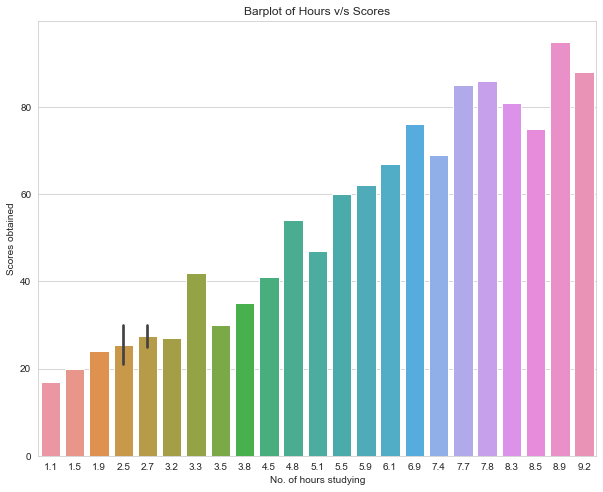

In [19]:
# Barplot of Hours v/s Scores
plt.figure(figsize=(10,8))
sns.barplot(Data['Hours'],Data['Scores'])
plt.title("Barplot of Hours v/s Scores")
plt.xlabel("No. of hours studying")
plt.ylabel("Scores obtained")

The barplot shows that as the hours of study increases so does the scores obtained by the students.

## Preparing the data

The next step is to prepare the data for training and testing.

In [20]:
# To divide dataset into attributes(input) and labels(output)

x_data = Data.iloc[:, :-1].values
y_data = Data.iloc[:, 1].values

In [21]:
x_data

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [22]:
y_data

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

## Training and Testing of the Dataset

In [23]:
# Importing module for splitting the dataset into testing and training data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=0)
print("Number of test samples :", x_test.shape[0])
print("Number of training samples", x_train.shape[0])

Number of test samples : 5
Number of training samples 20


In [24]:
# Importing module for linear regression and creating LinearRegression object

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [25]:
# Fitting the training model 

lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# Intercept and coefficient of the model

intercept = lr.intercept_
coefficient = lr.coef_
print("The intercept of the trained model = ",intercept)
print("The coefficient of the trained model = ",coefficient)

The intercept of the trained model =  2.018160041434683
The coefficient of the trained model =  [9.91065648]


In [27]:
# Regression line

print("regression_line = coefficient * x_train + intercept")
print("y = 9.9106 * x_train + 2.01816")

regression_line = coefficient * x_train + intercept
y = 9.9106 * x_train + 2.01816


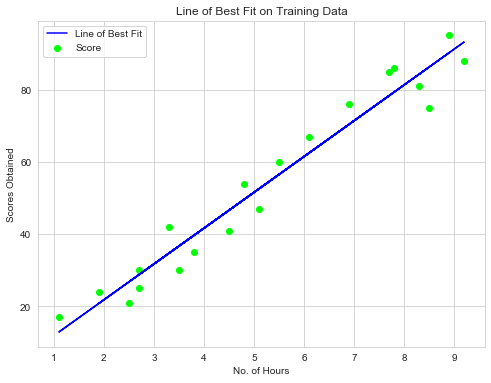

In [28]:
# Plotting the regression line of the training dataset

plt.figure(figsize=(8,6))
plt.scatter(x_train, y_train, color="lime", label="Score")
plt.plot(x_train, lr.predict(x_train), color="blue", label="Line of Best Fit")
plt.title("Line of Best Fit on Training Data")
plt.xlabel("No. of Hours")
plt.ylabel("Scores Obtained")
plt.legend()
plt.show()

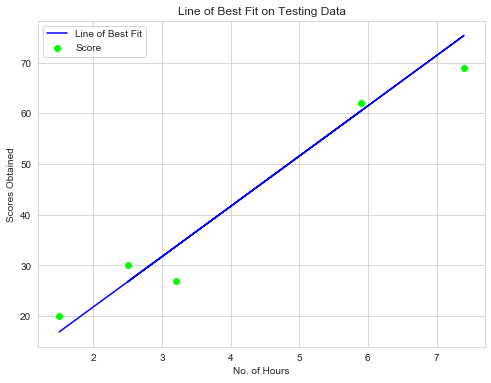

In [29]:
# Plotting the regression line on testing data

plt.figure(figsize=(8,6))
plt.scatter(x_test, y_test, color="lime", label="Score")
plt.plot(x_test, lr.predict(x_test), color="blue", label="Line of Best Fit")
plt.title("Line of Best Fit on Testing Data")
plt.xlabel("No. of Hours")
plt.ylabel("Scores Obtained")
plt.legend()
plt.show()

In [30]:
# Predicting y-value

y_predicted = lr.predict(x_test)
print(y_predicted)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [31]:
# Checking the difference in predicted and actual y values

df = pd.DataFrame({"Actual" : y_test, "Predicted": y_predicted, "Difference" : (y_test-y_predicted)})
df

,Actual,Predicted,Difference
0,20,16.884145,3.115855
1,27,33.732261,-6.732261
2,69,75.357018,-6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


## Barplot of Actual and predicted values of y

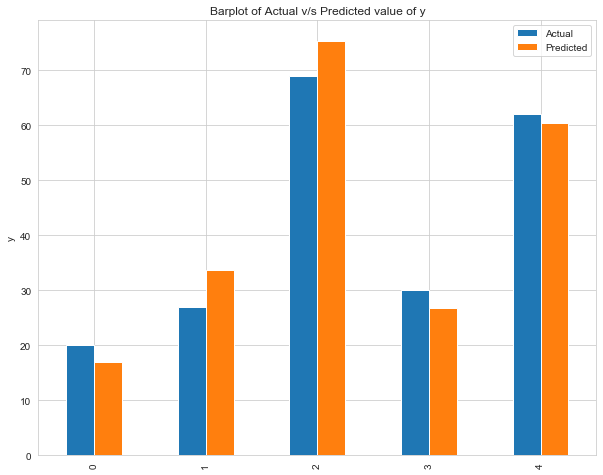

In [32]:
# Barplot of y_test and y_predicted

df_1 = pd.DataFrame({"Actual": y_test, "Predicted": y_predicted})
df_1.plot(kind='bar',figsize=(10,8))
plt.title("Barplot of Actual v/s Predicted value of y")
plt.ylabel("y")
plt.show()

### Question) What is the predicted marks obtained when a student studies for 9.25 hours per day?

In [33]:
# Predicted score obtained by the student if he/she study for x hours

hours = float(input("Enter the hours of study :"))
predicted_score = lr.predict([[hours]])
print("Total no. of hours = ",hours )
print("Predicted Score = ", predicted_score)

Enter the hours of study :9.25
Total no. of hours =  9.25
Predicted Score =  [93.69173249]


If the student studies for 9.25 hours then his/her predicted score will be 93.69%.

## Model Evaluation

The final step is to evaluate the performance of our fitted model. This step is carried out in order to compare how well our model perform on a particular dataset. For that we will be calculating the model accuracy, mean absolute error, mean squared error and root mean square.

In [34]:
# Checking the accuracy of the linear regression model

Accuracy = (lr.score(x_train, y_train))*100
print("The accuracy of the model = ", Accuracy)

The accuracy of the model =  95.15510725211553


In [35]:
# Calculating mean absolute error and root mean square error

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test,y_predicted)
rms = np.sqrt(mean_squared_error(y_test,y_predicted))

print("Mean Absolute Error =", mae)
print("Mean squared Error =", mse)
print("Root Mean Square Error =", rms)

Mean Absolute Error = 4.183859899002975
Mean squared Error = 21.5987693072174
Root Mean Square Error = 4.6474476121003665


In [36]:
# Coefficient of Determination

R2 = r2_score(y_test,y_predicted)
print("The coefficient of determination = ",R2)

The coefficient of determination =  0.9454906892105356


The coefficient of determinantion is coming out to be 0.9454 which indicates that 94.54% of the variability in data is explained by the model.